**Sharvari Lahane**
**Data Science - Batch May 2024 (Baner, Pune) - Assignment 16**
**KNN**

**Task 1: Analyse the data using the visualizations**

Importing Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Loading the dataset

In [3]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Visualizing the Data

Histograms for numerical columns

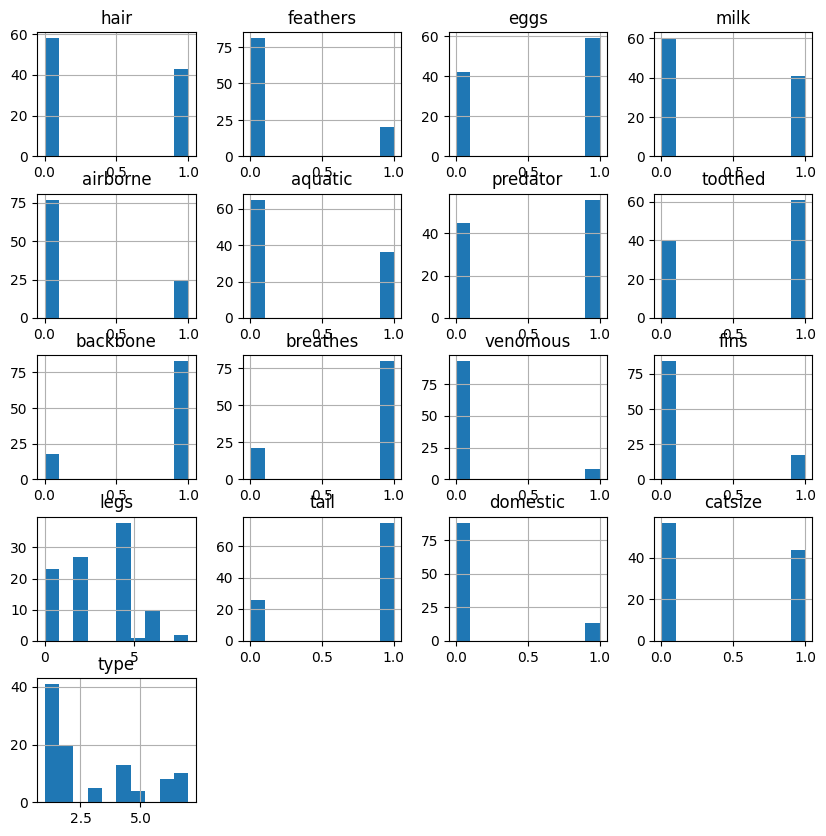

In [9]:
df.hist(figsize=(10, 10))
plt.show()

Bar plots for categorical columns

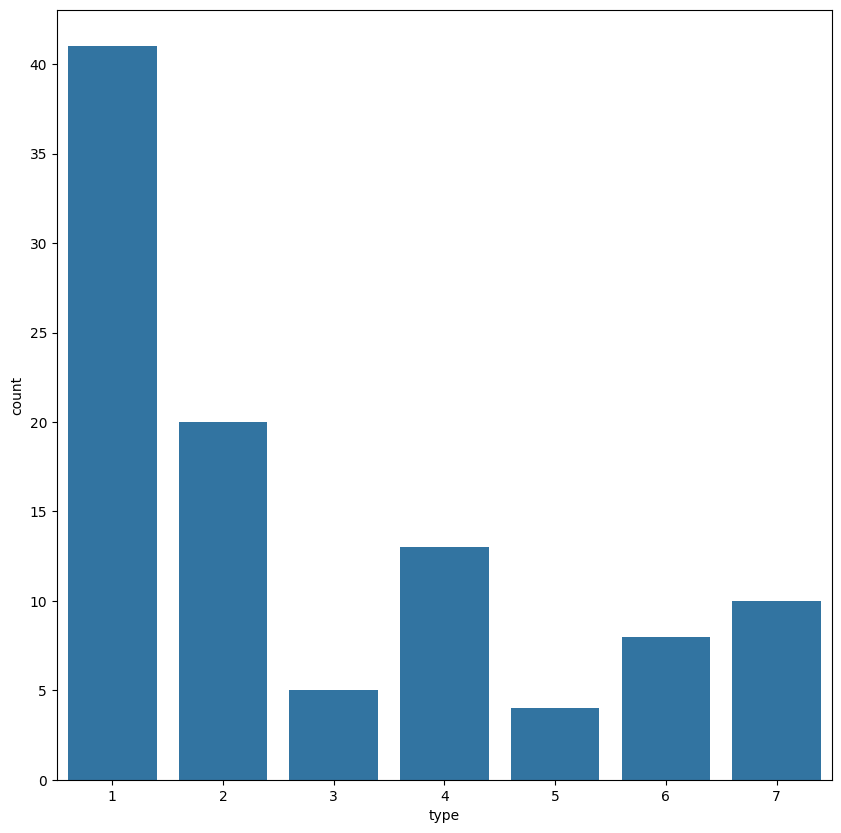

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'type' is in the columns
if 'type' in df.columns:
    plt.figure(figsize=(10, 10))
    sns.countplot(x='type', data=df)
    plt.show()
else:
    print("The column 'type' does not exist in the DataFrame.")

Heatmap for correlation between columns

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


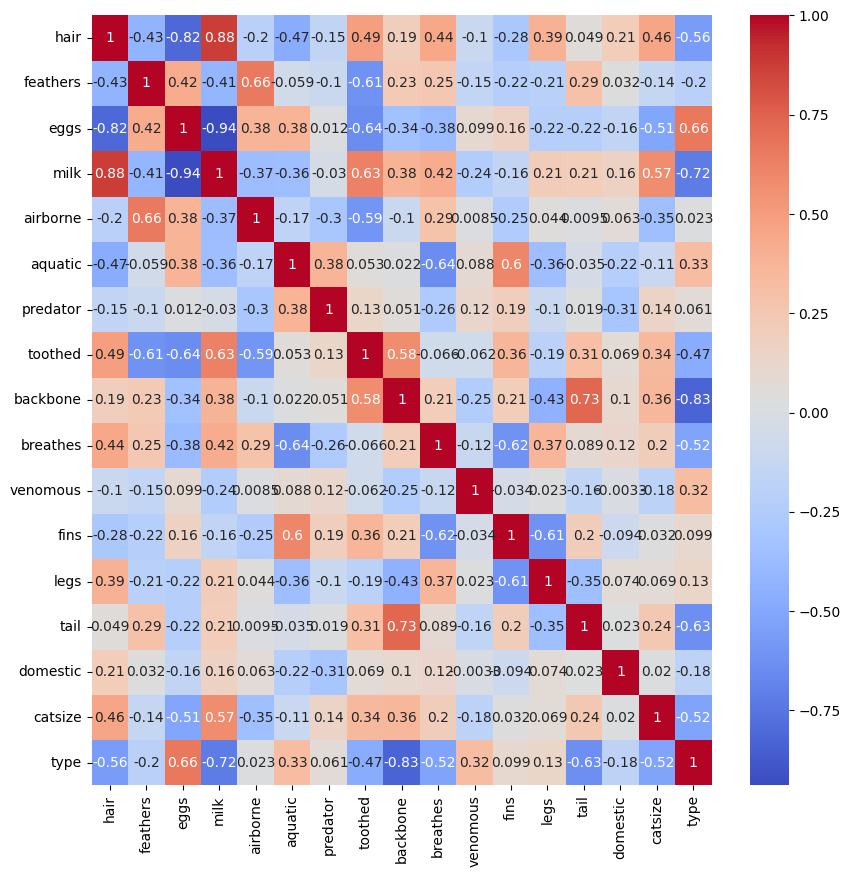

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Pairplot for relationships between columns

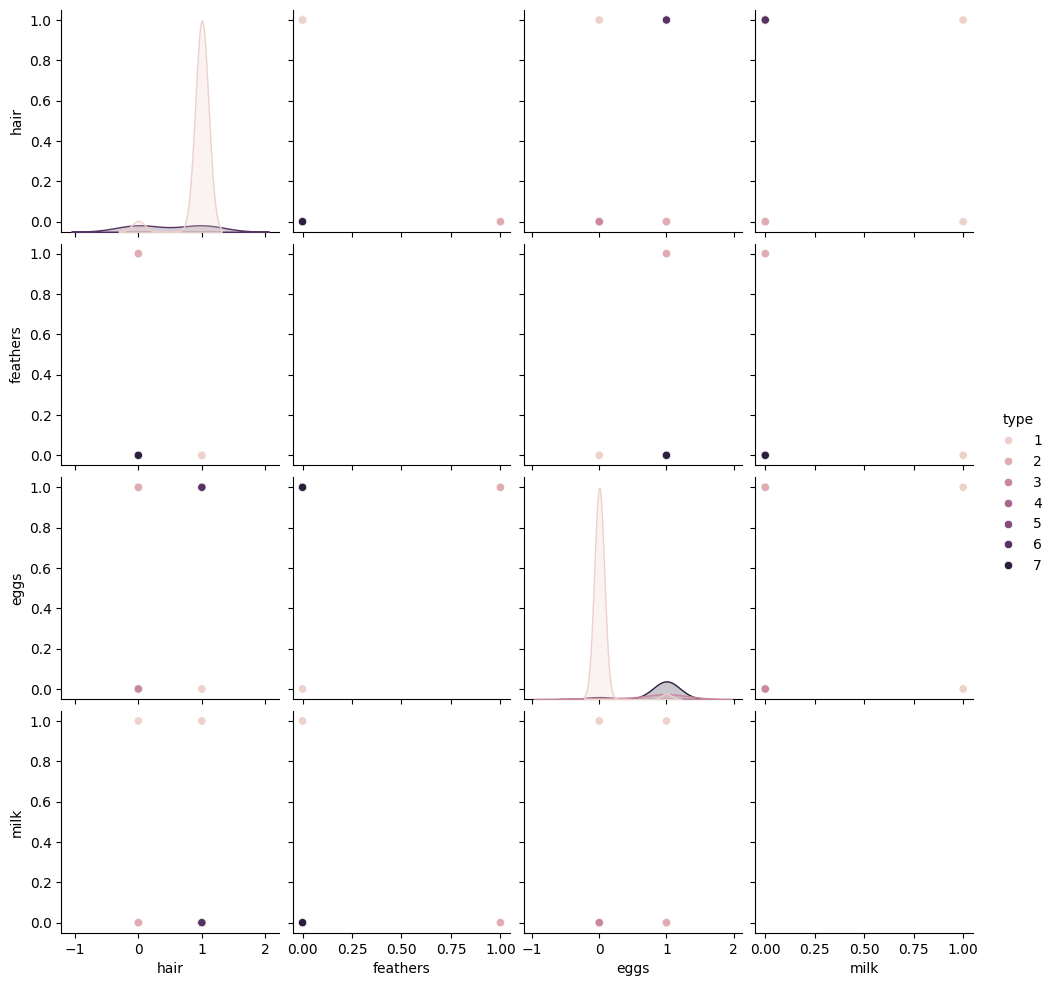

In [13]:
sns.pairplot(df, vars=['hair', 'feathers', 'eggs', 'milk'], hue='type')
plt.show()

##**Task 2: Preprocess the data by handling missing values & Outliers, if any.**

In [14]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


Boxplots for numerical columns

<Figure size 1000x1000 with 0 Axes>

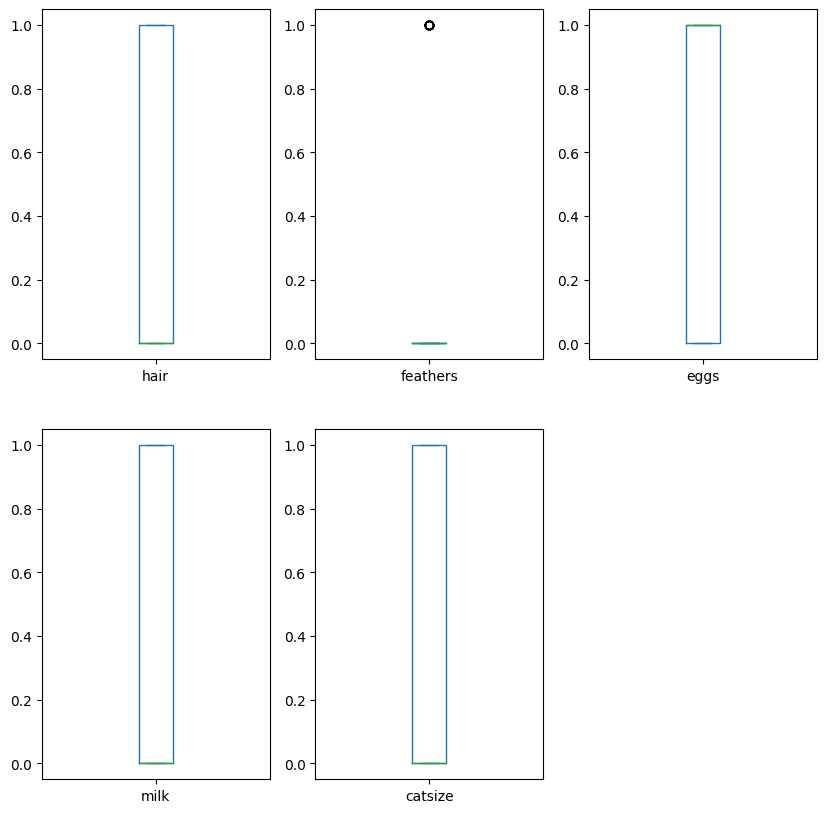

In [15]:
plt.figure(figsize=(10, 10))
df[['hair', 'feathers', 'eggs', 'milk', 'catsize']].plot(kind='box', subplots=True, layout=(2, 3), figsize=(10, 10))
plt.show()

Encoding Categorical Columns

In [16]:
le = LabelEncoder()

df['hair'] = le.fit_transform(df['hair'])
df['feathers'] = le.fit_transform(df['feathers'])
df['eggs'] = le.fit_transform(df['eggs'])
df['milk'] = le.fit_transform(df['milk'])
df['airborne'] = le.fit_transform(df['airborne'])
df['aquatic'] = le.fit_transform(df['aquatic'])
df['predator'] = le.fit_transform(df['predator'])
df['toothed'] = le.fit_transform(df['toothed'])
df['backbone'] = le.fit_transform(df['backbone'])
df['breathes'] = le.fit_transform(df['breathes'])
df['venomous'] = le.fit_transform(df['venomous'])
df['fins'] = le.fit_transform(df['fins'])
df['legs'] = le.fit_transform(df['legs'])
df['tail'] = le.fit_transform(df['tail'])
df['domestic'] = le.fit_transform(df['domestic'])
df['catsize'] = le.fit_transform(df['catsize'])
df['type'] = le.fit_transform(df['type'])

Scaling the Data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['hair', 'feathers', 'eggs', 'milk', 'catsize']] = scaler.fit_transform(df[['hair', 'feathers', 'eggs', 'milk', 'catsize']])

In [18]:
df[['hair', 'feathers', 'eggs', 'milk', 'catsize']]

,hair,feathers,eggs,milk,catsize
0,1.161395,-0.496904,-1.185227,1.209717,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,1.138180
...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.878595


##**Task 3: Split the dataset into training and testing sets (80% training, 20% testing).**

In [19]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and the target variable (Y)
X = df.drop('type', axis=1)
Y = df['type']

In [20]:
X

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,0,0,1.138180
1,antelope,1.161395,-0.496904,-1.185227,1.209717,0,0,0,1,1,1,0,0,2,1,0,1.138180
2,bass,-0.861034,-0.496904,0.843721,-0.826640,0,1,1,1,1,0,0,1,0,1,0,-0.878595
3,bear,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,0,0,1.138180
4,boar,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,1,0,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1.161395,-0.496904,-1.185227,1.209717,0,0,0,1,1,1,0,0,1,1,0,1.138180
97,wasp,1.161395,-0.496904,0.843721,-0.826640,1,0,0,0,0,1,1,0,4,0,0,-0.878595
98,wolf,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,1,0,1.138180
99,worm,-0.861034,-0.496904,0.843721,-0.826640,0,0,0,0,0,1,0,0,0,0,0,-0.878595


In [21]:
Y

,type
0,0
1,0
2,3
3,0
4,0
...,...
96,0
97,5
98,0
99,6


Splitting the dataset into training and testing sets (80% training, 20% testing)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
X_train

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,toad,-0.861034,-0.496904,0.843721,-0.826640,0,1,0,1,1,1,0,0,2,0,0,-0.878595
26,frog,-0.861034,-0.496904,0.843721,-0.826640,0,1,1,1,1,1,1,0,2,0,0,-0.878595
42,ladybird,-0.861034,-0.496904,0.843721,-0.826640,1,0,1,0,0,1,0,0,4,0,0,-0.878595
70,reindeer,1.161395,-0.496904,-1.185227,1.209717,0,0,0,1,1,1,0,0,2,1,1,1.138180
15,crayfish,-0.861034,-0.496904,0.843721,-0.826640,0,1,1,0,0,0,0,0,4,0,0,-0.878595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,pike,-0.861034,-0.496904,0.843721,-0.826640,0,1,1,1,1,0,0,1,0,1,0,1.138180
71,rhea,-0.861034,2.012461,0.843721,-0.826640,0,0,1,0,1,1,0,0,1,1,0,1.138180
14,crab,-0.861034,-0.496904,0.843721,-0.826640,0,1,1,0,0,0,0,0,2,0,0,-0.878595
92,tuna,-0.861034,-0.496904,0.843721,-0.826640,0,1,1,1,1,0,0,1,0,1,0,1.138180


In [24]:
X_test

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,squirrel,1.161395,-0.496904,-1.185227,1.209717,0,0,0,1,1,1,0,0,1,1,0,-0.878595
55,oryx,1.161395,-0.496904,-1.185227,1.209717,0,0,0,1,1,1,0,0,2,1,0,1.138180
66,porpoise,-0.861034,-0.496904,-1.185227,1.209717,0,1,1,1,1,1,0,1,0,1,0,1.138180
67,puma,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,1,0,1.138180
45,lion,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,1,0,1.138180
39,honeybee,1.161395,-0.496904,0.843721,-0.826640,1,0,0,0,0,1,1,0,4,0,1,-0.878595
22,elephant,1.161395,-0.496904,-1.185227,1.209717,0,0,0,1,1,1,0,0,2,1,0,1.138180
44,leopard,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,1,0,1.138180
10,cheetah,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,1,0,1.138180
0,aardvark,1.161395,-0.496904,-1.185227,1.209717,0,0,1,1,1,1,0,0,2,0,0,1.138180


In [25]:
Y_train

,type
89,4
26,4
42,5
70,0
15,6
...,...
60,3
71,1
14,6
92,3


In [26]:
Y_test

,type
84,0
55,0
66,0
67,0
45,0
39,5
22,0
44,0
10,0
0,0


In [27]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (80, 17) (80,)
Testing set shape: (21, 17) (21,)


##**Task 4: Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset.**

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)
Y_train = le.fit_transform(Y_train)

In [29]:
le

LabelEncoder()

In [30]:
X_train

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,69,0,0,1,0,0,1,0,1,1,1,0,0,2,0,0,0
26,19,0,0,1,0,0,1,1,1,1,1,1,0,2,0,0,0
42,31,0,0,1,0,1,0,1,0,0,1,0,0,4,0,0,0
70,54,1,0,0,1,0,0,0,1,1,1,0,0,2,1,1,1
15,11,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,46,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
71,55,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,1
14,10,0,0,1,0,0,1,1,0,0,0,0,0,2,0,0,0
92,72,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [31]:
Y_train

array([4, 4, 5, 0, 6, 5, 6, 0, 0, 1, 2, 0, 0, 1, 0, 0, 6, 0, 1, 6, 3, 3,
       1, 3, 0, 0, 0, 4, 2, 0, 6, 5, 0, 0, 3, 3, 1, 0, 0, 0, 5, 1, 1, 0,
       0, 0, 6, 0, 3, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 6, 1, 0, 0, 4,
       1, 3, 1, 1, 6, 0, 3, 3, 1, 3, 1, 6, 3, 5])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Creating a K-Nearest Neighbours classifier with k=5

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)

Training the model on the training data

In [34]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Making predictions on the training data

In [35]:
Y_pred = knn.predict(X_train)

Evaluating the model on the training data

In [36]:
print("Training Accuracy:", accuracy_score(Y_train, Y_pred))
print("Training Classification Report:")
print(classification_report(Y_train, Y_pred, zero_division=0))
print("Training Confusion Matrix:")
print(confusion_matrix(Y_train, Y_pred))

Training Accuracy: 0.5625
Training Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.93      0.71        29
           1       0.48      0.61      0.54        18
           2       0.50      0.50      0.50         4
           3       1.00      0.27      0.43        11
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.67      0.22      0.33         9

    accuracy                           0.56        80
   macro avg       0.46      0.36      0.36        80
weighted avg       0.55      0.56      0.50        80

Training Confusion Matrix:
[[27  2  0  0  0  0  0]
 [ 6 11  0  0  0  0  1]
 [ 2  0  2  0  0  0  0]
 [ 4  3  1  3  0  0  0]
 [ 3  0  1  0  0  0  0]
 [ 1  4  0  0  0  0  0]
 [ 4  3  0  0  0  0  2]]


##**Task 5: Choose an appropriate distance metric and value for K.**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Encoding categorical features using LabelEncoder

In [38]:
le = LabelEncoder()
for col in ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic']:
    X[col] = le.fit_transform(X[col])

Evaluate the model

In [39]:
if len(Y) > len(Y_pred):
    Y = Y[:len(Y_pred)]
else:
    Y_pred = Y_pred[:len(Y)]

In [40]:
accuracy = accuracy_score(Y, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3


##**Task 6: Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [43]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [44]:
X_encoded

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal name_tuatara,animal name_tuna,animal name_vampire,animal name_vole,animal name_vulture,animal name_wallaby,animal name_wasp,animal name_wolf,animal name_worm,animal name_wren
0,1,0,0,1,0,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,1,0,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,0,0,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,1,0,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1,0,0,1,0,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,False,False,False,False,False,True,False,False,False,False
97,1,0,1,0,1,0,0,0,0,1,...,False,False,False,False,False,False,True,False,False,False
98,1,0,0,1,0,0,1,1,1,1,...,False,False,False,False,False,False,False,True,False,False
99,0,0,1,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False


In [45]:
print(Y_test.shape)
print(Y_pred.shape)

(21,)
(80,)


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Finding the common elements between Y_test and Y_pred

In [50]:
common_elements = np.intersect1d(Y_test, Y_pred)

Creating new arrays with the common elements

In [51]:
Y_test_common = np.array([y for y in Y_test if y in common_elements])
Y_pred_common = np.array([y for y in Y_pred if y in common_elements])

Checking the shape of Y_test_common and Y_pred_common

In [52]:
print("Y_test_common shape:", Y_test_common.shape)
print("Y_pred_common shape:", Y_pred_common.shape)

Y_test_common shape: (5,)
Y_pred_common shape: (5,)


Calculating the metrics

In [53]:
accuracy = accuracy_score(Y_test_common, Y_pred_common)
precision = precision_score(Y_test_common, Y_pred_common, average='weighted')
recall = recall_score(Y_test_common, Y_pred_common, average='weighted')
f1 = f1_score(Y_test_common, Y_pred_common, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


##**Task 7: Visualize the decision boundaries of the classifier.**

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [94]:
X_train_scaled = scaler.fit_transform(X_train)

Training a Logistic Regression classifier

In [96]:
clf = LogisticRegression()
clf.fit(X_train_scaled, Y_train)

LogisticRegression()

Performing PCA to reduce dimensionality to 2D

In [97]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

Plotting the decision boundary

In [100]:
# Assuming X_train_pca has shape (n_samples, 17)
x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))

# Create a 2D array with shape (n_samples, 17) by concatenating the meshgrid points
# with zeros for the remaining 15 features
X_grid = np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.size, 15))]

Z = clf.predict(X_grid)
Z = Z.reshape(xx.shape)

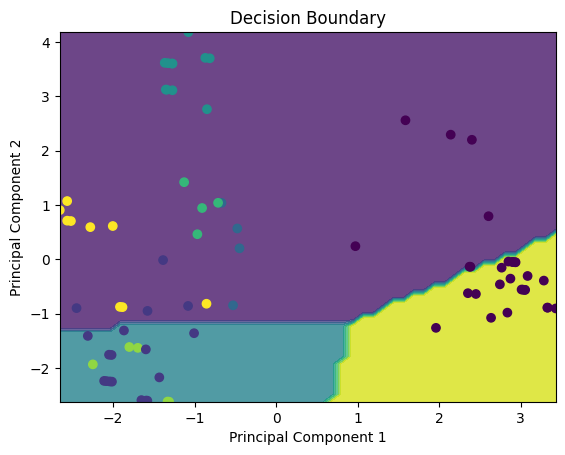

In [102]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary')
plt.show()

**Interview Questions:**

**1. What are the key hyperparameters in KNN?**

The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:

Number of Neighbors (k):

This is the most important hyperparameter. 

It determines the number of nearest neighbors to consider when making a prediction. 

A smaller value of k can lead to a model that captures noise in the training data (overfitting), while a larger value of k might lead to a model that oversimplifies the patterns in the data (underfitting). 

Choosing the right value for k is crucial for the performance of the KNN algorithm.

Distance Metric:

This hyperparameter defines how the distance between data points is calculated. 

Common distance metrics include:

Euclidean Distance: The most common distance metric, suitable for continuous features.

Manhattan Distance: Useful when the data is high-dimensional or when the features are not continuous.

Minkowski Distance: A generalized form that includes both Euclidean and Manhattan distances as special cases.

Hamming Distance: Used for categorical variables.

Weighting Function:

This hyperparameter determines how the influence of each neighbor is weighted when making a prediction. 

Options include:

Uniform Weighting: All neighbors contribute equally to the prediction.

Distance Weighting: Closer neighbors have a higher weight, meaning their contribution is more significant than that of farther neighbors. 

This can often improve performance in cases where closer neighbors are more likely to have similar outcomes.

Algorithm for Computing Nearest Neighbors:

This hyperparameter controls the method used to compute the nearest neighbors efficiently. 

Common algorithms include:

Brute Force: Computes the distance between the query point and all other points in the training set. This is accurate but computationally expensive for large datasets.

KD-Tree: Efficient for low-dimensional data, it partitions the space to reduce the number of points considered when searching for neighbors.

Ball Tree: Suitable for high-dimensional data and works by constructing a tree structure that helps in faster neighbor searches.

Leaf Size (for KD-Tree and Ball Tree algorithms):

This hyperparameter affects the speed of the construction and query processes in tree-based algorithms. 

A smaller leaf size can lead to more accurate results but increases computational cost.

Choosing the right combination of these hyperparameters is essential for optimizing the performance of the KNN algorithm for a specific dataset. 

This typically involves experimentation and cross-validation.

**2. What distance metrics can be used in KNN?**

Distance Metric:

This hyperparameter defines how the distance between data points is calculated.

Common distance metrics include:

Euclidean Distance: The most common distance metric, suitable for continuous features. It calculates the straight-line distance between two points in Euclidean space.

Manhattan Distance (L1 Norm or Taxicab Distance): Useful when the data is high-dimensional or when the features are not continuous. Computes the distance between two points by summing the absolute differences of their coordinates.

Minkowski Distance: A generalized form that includes both Euclidean and Manhattan distances as special cases. It has a parameter 𝑝 

p that determines the type of distance:

If 𝑝 = 1

p=1, Minkowski distance is equivalent to Manhattan distance.

If 𝑝 = 2

p=2, Minkowski distance is equivalent to Euclidean distance.

Hamming Distance: Used for categorical variables. Counts the number of positions at which the corresponding elements are different.
Suitable for cases where features are not continuous and can be compared directly.

Chebyshev Distance: Measures the maximum absolute difference between the coordinates of two points. Suitable for scenarios where the maximum difference in any dimension is of interest.

Cosine Similarity (converted to a distance measure): Measures the cosine of the angle between two vectors in a multi-dimensional space. Often used for text classification and high-dimensional spaces where the magnitude of the vectors is not as important as their direction.

Likewise, there are many distance metrics can be used in KNN.

In K-Nearest Neighbors (KNN), several distance metrics can be used to measure the similarity or dissimilarity between data points. 

The choice of distance metric can significantly impact the performance of the KNN algorithm, especially depending on the nature of the data. 